The following notebook can make a waterfall plot given a dataset. Here I use 2 hours worth of J1748-2021A with 10s subint length.

In [1]:
import psrchive

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.signal import savgol_filter

In [4]:
os.chdir('/idia/projects/pulsar-timing/users/athambiran/MSc_NGC6440A/timing/121mins_10sub')

In [5]:
arch = psrchive.Archive_load('121mins.t10.f4.C.pazi.pazi')

In [6]:
arch.fscrunch()

In [7]:
arch.remove_baseline()
arch.convert_state("Stokes")

In [8]:
arch.bscrunch(4) 

In [9]:
obs_duration = arch.integration_length()
num_chan = arch.get_nchan()
num_subint = arch.get_nsubint()
num_bins = arch.get_nbin()
num_pol = arch.get_npol()
pol_state = arch.get_state()

print(f'And has the following characteristics:\n')
print(f'Observation duration of \t\t\t {obs_duration:.2f} seconds')
print(f'Number of frequency channels\t\t\t {num_chan}')
print(f'Number of polarisations \t\t\t {num_pol}')
print(f'In polarisation state \t\t\t\t {pol_state}')
print(f'Number of subintegrations (time blocks)\t\t {num_subint}')
print(f'Each subintegration (time block) is made up of   {num_bins} data bins')

And has the following characteristics:

Observation duration of 			 8826.67 seconds
Number of frequency channels			 1
Number of polarisations 			 4
In polarisation state 				 Stokes
Number of subintegrations (time blocks)		 912
Each subintegration (time block) is made up of   256 data bins


In [392]:
ext:stt_date     Start UT date                                                2019-07-18
ext:stt_time     Start UT                                                     18:32:56

SyntaxError: invalid syntax (2861538699.py, line 1)

In [10]:
data = arch.get_data()

In [11]:
np.shape(data) #subint, pol, freq, bin

(912, 4, 1, 256)

In [12]:
x = data[:,0,0,:]

In [13]:
np.shape(x)

(912, 256)

In [14]:
arch.get_source()

'J1748-2021A'

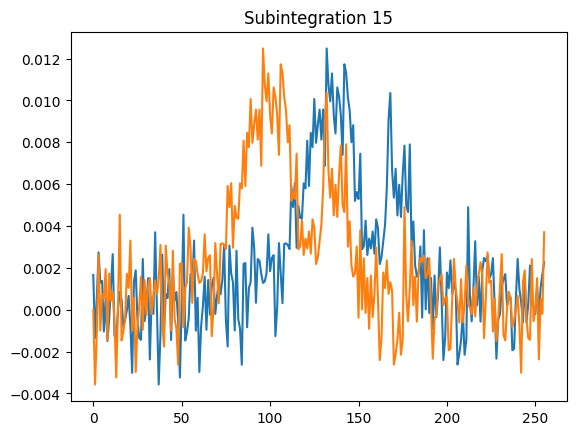

In [15]:
subint=15
roll_with=220

plt.plot(x[subint])

x_rolled=np.roll(x,roll_with,axis=1)
plt.plot(x_rolled[subint])
plt.title('Subintegration 15')
plt.show()

In [16]:
data_rolled = x_rolled

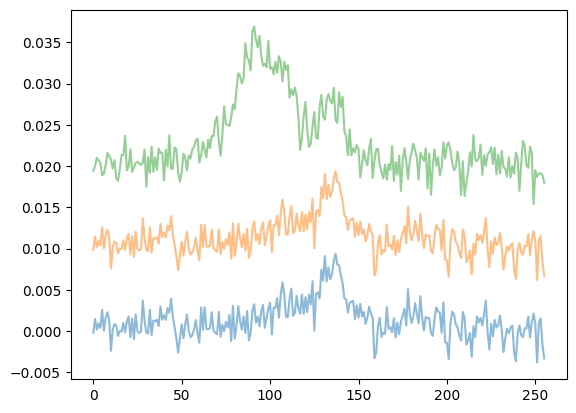

In [17]:
plt.plot(data_rolled[0,:], alpha=0.5)
plt.plot(data_rolled[1,:]+0.01, alpha=0.5)
plt.plot(data_rolled[2,:]+0.02, alpha=0.5)
plt.show()

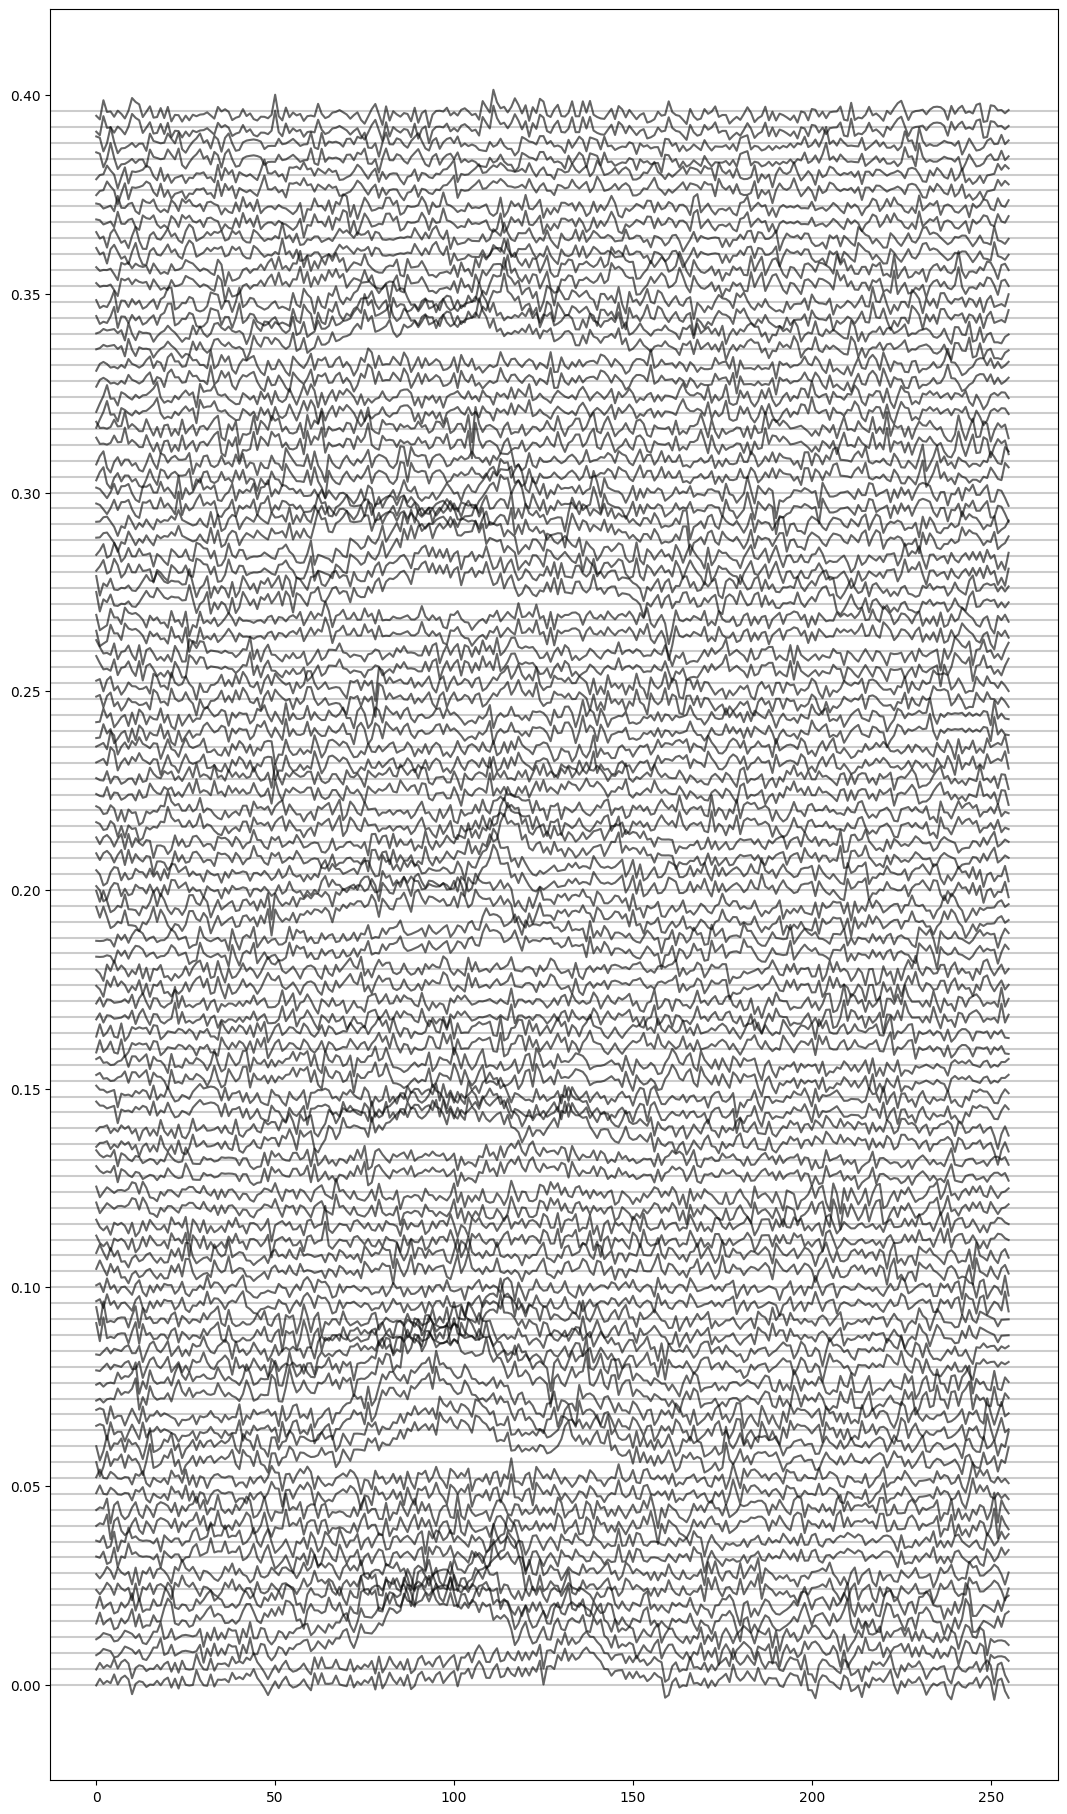

In [20]:
plt.figure(figsize=[13,23])
multiple=0.004

for i in range(100):
    plt.fill_between(len(data_rolled[i,:]), multiple*i, data_rolled[i,:] + (multiple*i), color="white", alpha=1)
    plt.plot(data_rolled[i,:]+(multiple*i), alpha=0.6,color='black')
    plt.axhline(multiple*i,alpha=0.2,color='black')

plt.show()

In [ ]:
from scipy.signal import savgol_filter

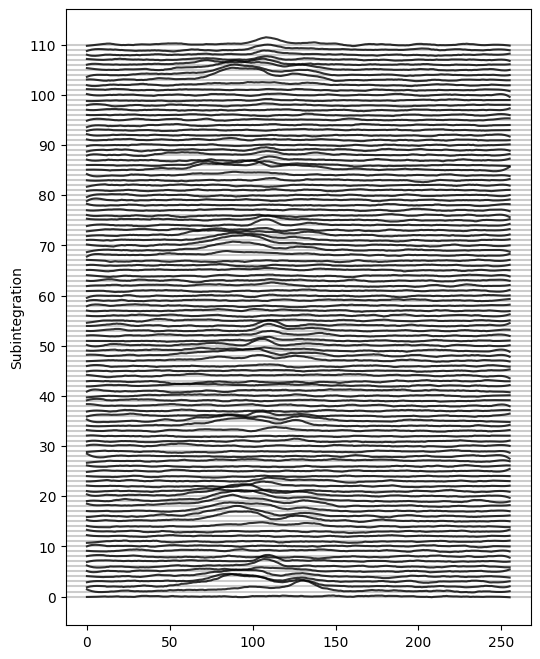

In [223]:
plt.figure(figsize=[6,8])

for i in range(111):
    y_raw = data_rolled[i,:]
    y = savgol_filter(y_raw, window_length=21, polyorder=3) + (multiple*i)  
    x = np.arange(len(y)) #x axis is nbin

    plt.fill_between(x, multiple*i, y, color="white", alpha=1)
    
    plt.axhline(multiple*i, alpha=0.2, color='black')
    plt.plot(x, y, alpha=0.8, color='black')

    yticks = [multiple*i for i in range(0, 111, 10)]   # every 10th subint
    plt.yticks(yticks, [str(i) for i in range(0, 111, 10)])
    plt.ylabel("Subintegration")

plt.show()

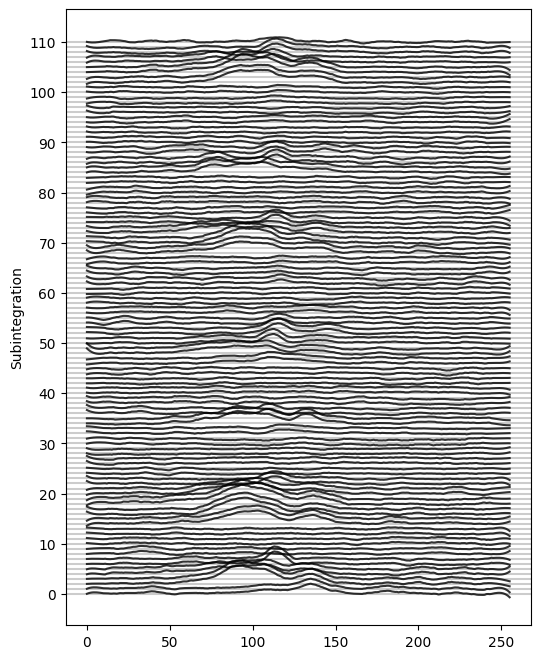

In [19]:
plt.figure(figsize=[6,8])

multiple=0.004
for i in range(111):
    y_raw = data_rolled[i,:]
    y = savgol_filter(y_raw, window_length=21, polyorder=3) + (multiple*i)  
    x = np.arange(len(y)) #x axis is nbin

    plt.fill_between(x, multiple*i, y, color="white", alpha=1)
    
    plt.axhline(multiple*i, alpha=0.2, color='black')
    plt.plot(x, y, alpha=0.8, color='black')

    yticks = [multiple*i for i in range(0, 111, 10)]   # every 10th subint
    plt.yticks(yticks, [str(i) for i in range(0, 111, 10)])
    plt.ylabel("Subintegration")

plt.show()

In [195]:
np.shape(data_rolled)

(1441, 256)

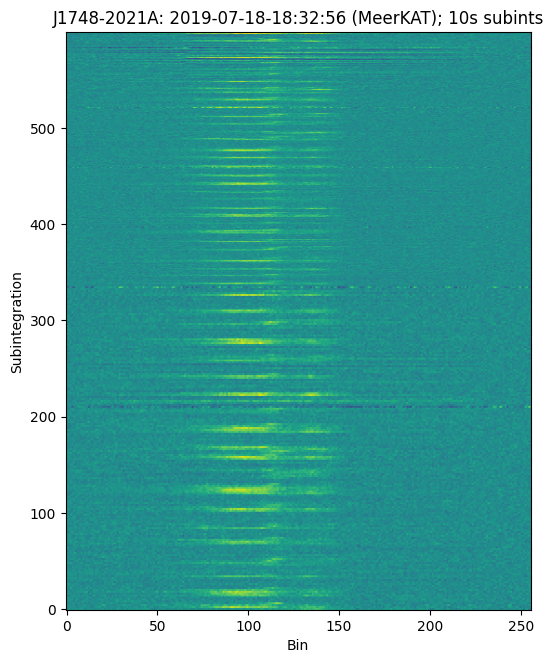

In [427]:
fig, ax = plt.subplots(figsize=(6, 7.5))

# Plot only first 600 rows, but scale y-axis from 0 → 8827
ax.imshow(data_rolled[0:600, :],
          origin='lower',
          aspect='auto')

ax.set_title('J1748-2021A: 2019-07-18-18:32:56 (MeerKAT); 10s subints')
ax.set_ylabel("Subintegration")
ax.set_xlabel("Bin")

plt.show()


Text(0.5, 1.0, 'J1748-2021A: 2019-07-18-18:32:56 (MeerKAT)')

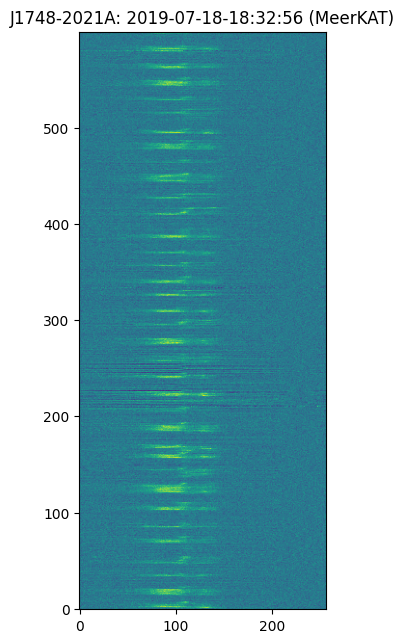

In [376]:
fig, ax = plt.subplots(figsize=(12, 7.5)) 
ax.imshow(data_rolled[0:600,:], origin='lower')
ax.set_title('J1748-2021A: 2019-07-18-18:32:56 (MeerKAT)')

J1748-2021A observed with MeerKAT for two hours at 2019-07-18-18:32:56. This data uses 10s subintegrations.


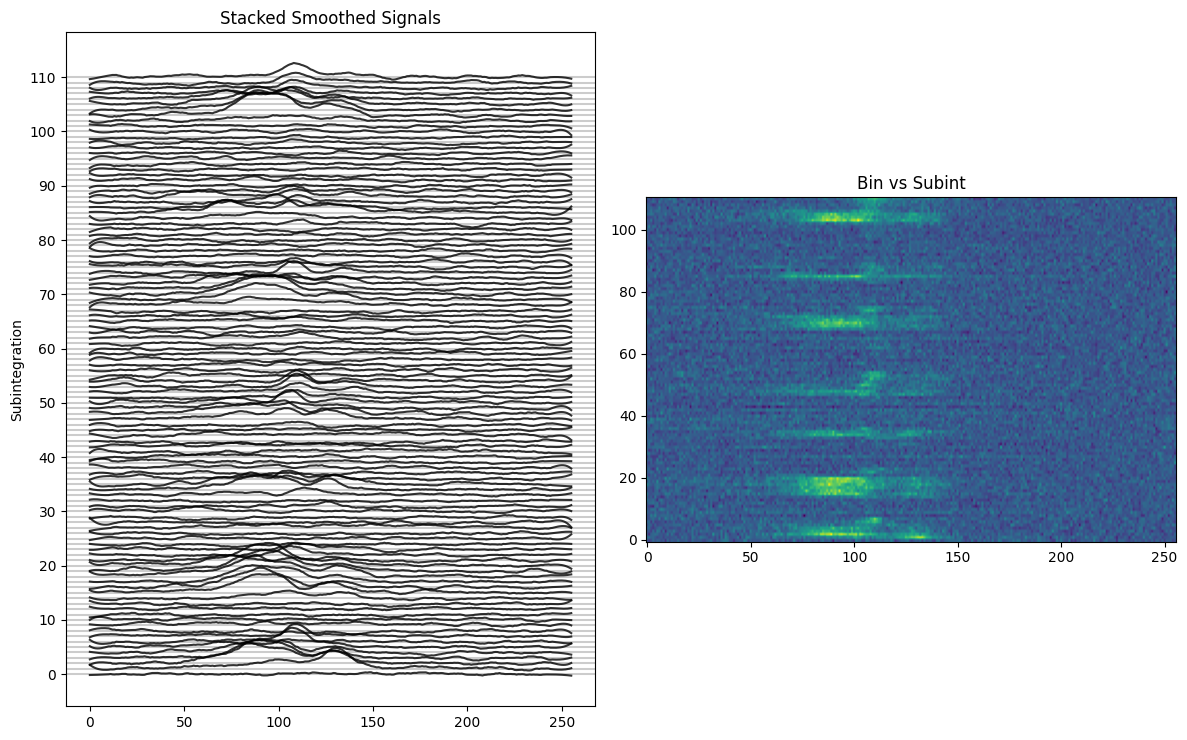

In [256]:
print('J1748-2021A observed with MeerKAT for two hours at 2019-07-18-18:32:56. This data uses 10s subintegrations.')

fig, axes = plt.subplots(1, 2, figsize=(12, 7.5))  # share y-axis

multiple=0.004
nrows = data_rolled.shape[0]

# --- First plot (stacked smoothed signals) ---
for i in range(111):
    y_raw = data_rolled[i,:]
    y = savgol_filter(y_raw, window_length=21, polyorder=3) + (multiple*i)  
    x = np.arange(len(y)) #x axis is nbin

    axes[0].fill_between(x, multiple*i, y, color="white", alpha=1)
    axes[0].axhline(multiple*i, alpha=0.2, color='black')
    axes[0].plot(x, y, alpha=0.8, color='black')

yticks = [multiple*i for i in range(0, 111, 10)]   # every 10th subint
axes[0].set_yticks(yticks, [str(i) for i in range(0, 111, 10)])
axes[0].set_ylabel("Subintegration")

axes[0].set_title("Stacked Smoothed Signals")
#axes[0].set_ylim(-0.001, multiple * (nrows + 1))   # align with imshow

# --- Second plot (imshow of raw data) ---
axes[1].imshow(data_rolled[0:111,:], aspect='1.5', origin='lower')
axes[1].set_title("Bin vs Subint")

plt.tight_layout()
plt.show()




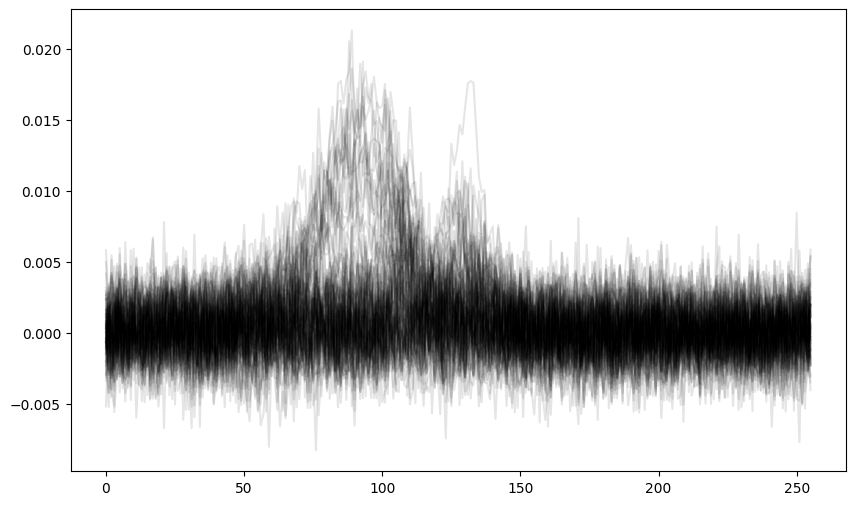

In [171]:
#plt.plot(data_rolled[0], alpha=0.5)
#plt.show()



plt.figure(figsize=[10,6])
for i in range(100):
    #plt.plot(data_rolled[i,:]+(0.01*i), alpha=0.5,color='black')
    plt.plot(data_rolled[i,:], alpha=0.1,color='black')
    #plt.axhline(0.01*i,alpha=0.2,color='black')
plt.show()

In [362]:
def process_archive(directory, name, bin_scrunch, plotted_subints, multiple):
    os.chdir(directory)
    arch = psrchive.Archive_load(name)
    arch.fscrunch()
    arch.remove_baseline()
    arch.dedisperse()
    arch.convert_state("Stokes")
    arch.bscrunch(bin_scrunch) 

    obs_duration = arch.integration_length()
    num_chan = arch.get_nchan()
    num_subint = arch.get_nsubint()
    num_bins = arch.get_nbin()
    num_pol = arch.get_npol()
    pol_state = arch.get_state()
    
    print(f'And has the following characteristics:\n')
    print(f'Observation duration of \t\t\t {obs_duration:.2f} seconds')
    print(f'Number of frequency channels\t\t\t {num_chan}')
    print(f'Number of polarisations \t\t\t {num_pol}')
    print(f'In polarisation state \t\t\t\t {pol_state}')
    print(f'Number of subintegrations (time blocks)\t\t {num_subint}')
    print(f'Each subintegration (time block) is made up of   {num_bins} data bins')

    data = arch.get_data()
    x = data[:,0,0,:]

    data_rolled = x

    #fig, axes = plt.subplots(1, 2, figsize=(12, 7.5))  # share y-axis
    fig, axes = plt.subplots(1, 2, figsize=(12, 10))

    nrows = data_rolled.shape[0]

    # --- First plot (stacked smoothed signals) ---
    for i in range(plotted_subints):
        y_raw = data_rolled[i,:]
        y = savgol_filter(y_raw, window_length=21, polyorder=3) + (multiple*i)  
        x = np.arange(len(y)) #x axis is nbin
    
        axes[0].fill_between(x, multiple*i, y, color="white", alpha=1)
        axes[0].axhline(multiple*i, alpha=0.2, color='black')
        axes[0].plot(x, y, alpha=0.8, color='black')
    
    yticks = [multiple*i for i in range(0, plotted_subints, 10)]   # every 10th subint
    axes[0].set_yticks(yticks, [str(i) for i in range(0, plotted_subints, 10)])
    axes[0].set_ylabel("Subintegration")
    
    axes[0].set_title("Stacked Smoothed Signals")
    #axes[0].set_ylim(-0.001, multiple * (nrows + 1))   # align with imshow
    
    # --- Second plot (imshow of raw data) ---
    axes[1].imshow(data_rolled[0:plotted_subints,:], aspect='1.5', origin='lower')
    axes[1].set_title("Bin vs Subint")
    
    plt.tight_layout()
    plt.show()


    return arch

And has the following characteristics:

Observation duration of 			 14392.00 seconds
Number of frequency channels			 1
Number of polarisations 			 4
In polarisation state 				 Stokes
Number of subintegrations (time blocks)		 900
Each subintegration (time block) is made up of   256 data bins


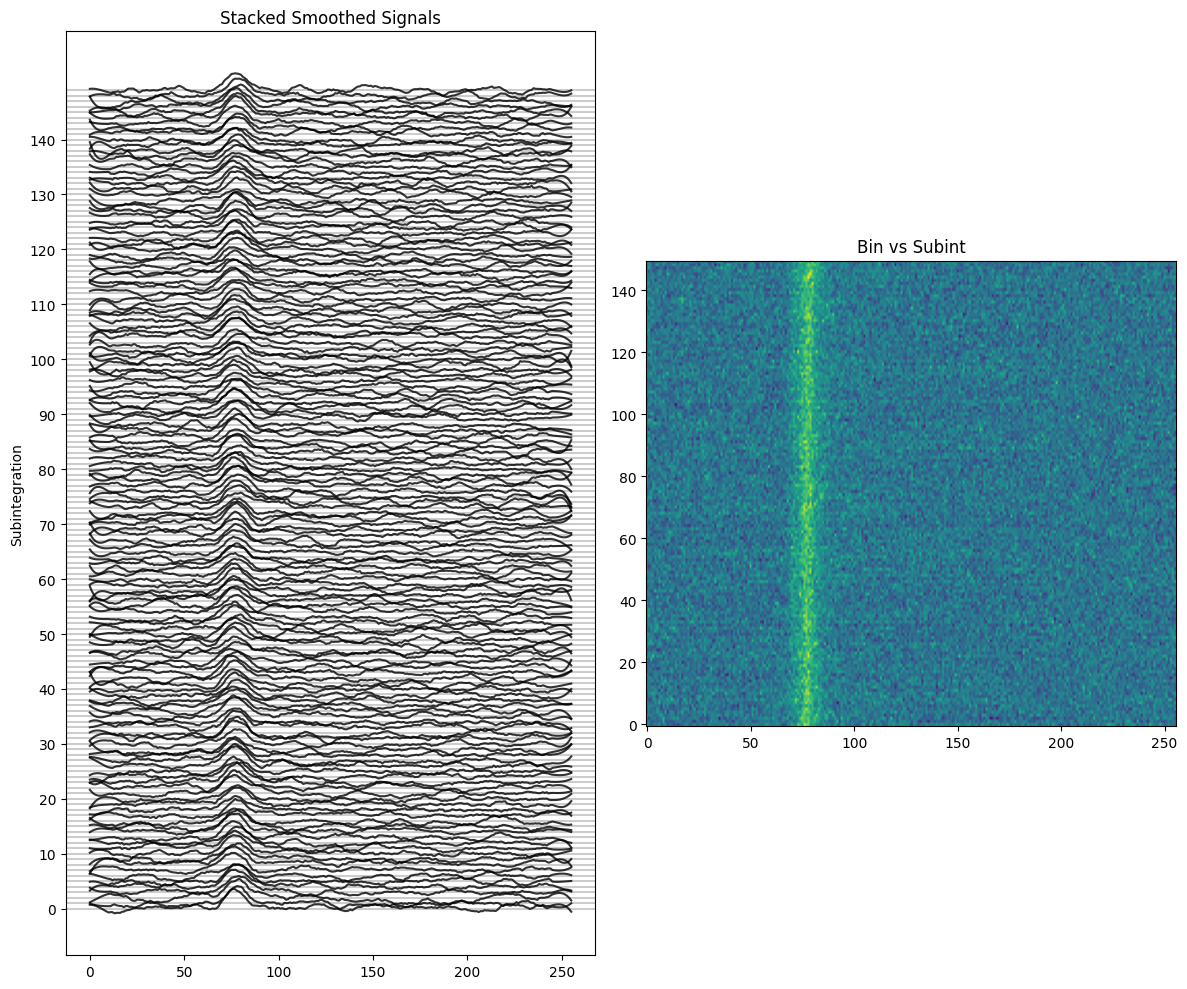

32 second subintegrations


In [363]:
jai_arch= process_archive('/idia/projects/pulsar-timing/data', 'J1757-1854_2021-11-18-11:06:28_zap.F.T1000.r.ar', 4, 150, 1)
print('32 second subintegrations')

In [356]:
def integrated_profile(arch, loop):
    num_bins = arch.get_nbin()
    
    data = arch.get_data()
    stokesI = data[:,0,0,:]
    
    plt.plot(stokesI[0,:], alpha=0.5)
    plt.plot(stokesI[1,:], alpha=0.5)
    #plt.plot(stokesI[0,:]+ stokesI[1,:])
    summed_profile = 0
    
    for i in range(loop):
        summed_profile = summed_profile + stokesI[i,:]
    plt.plot(summed_profile)
    plt.show()
    return summed_profile

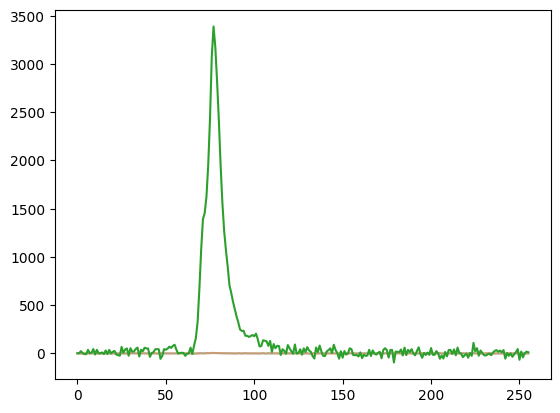

In [358]:
jai_data = integrated_profile(jai_arch, 900)

And has the following characteristics:

Observation duration of 			 8826.67 seconds
Number of frequency channels			 1
Number of polarisations 			 4
In polarisation state 				 Stokes
Number of subintegrations (time blocks)		 912
Each subintegration (time block) is made up of   256 data bins


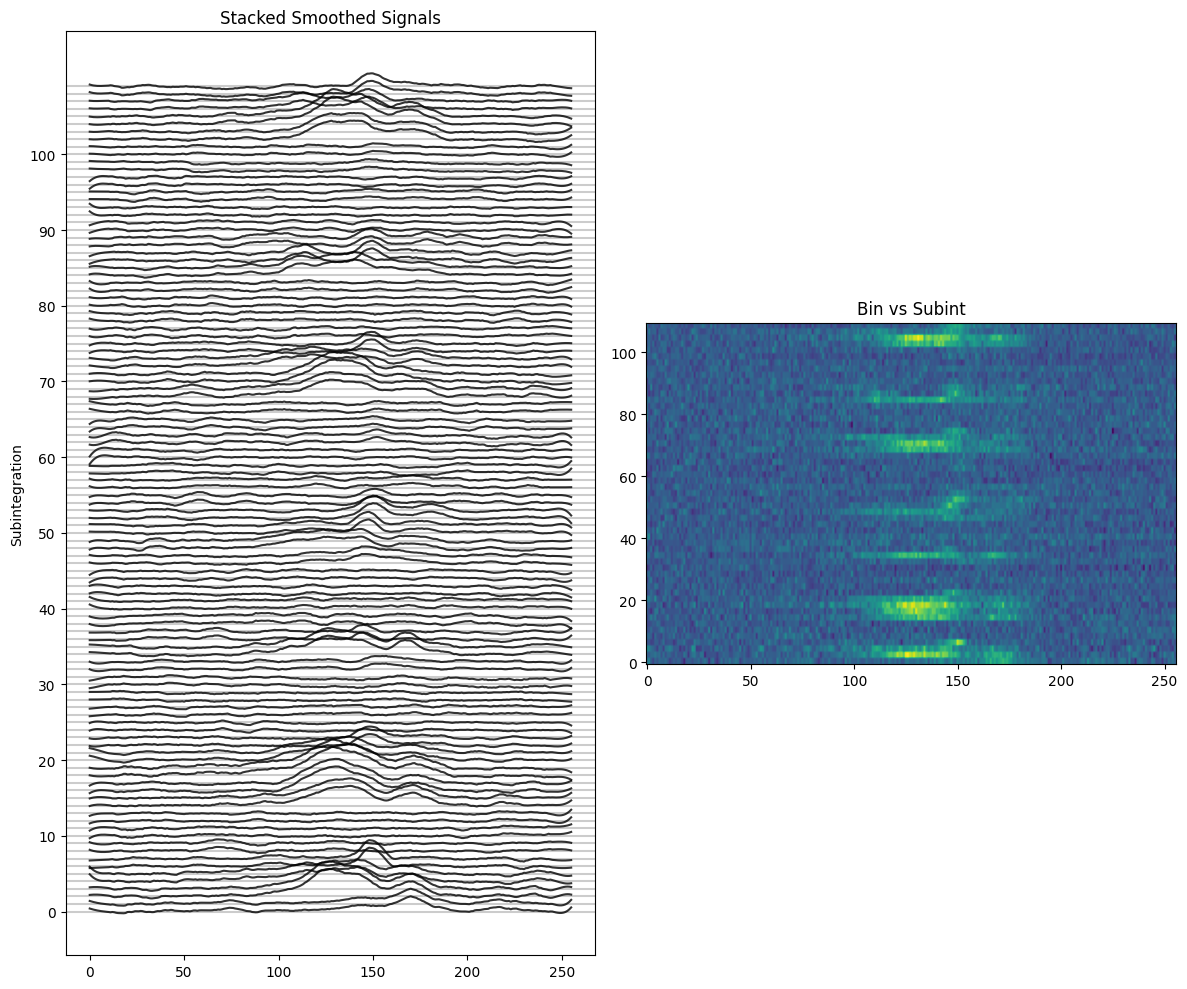

In [364]:
abi_psr = process_archive('/idia/projects/pulsar-timing/users/athambiran/MSc_NGC6440A/timing/121mins_10sub', '121mins.t10.f4.C.pazi.pazi', 4, 110, 0.004)

In [ ]:
jai_data = integrated_profile(jai_arch, 900)